## Predicting T20I Cricket match Score using Logistic Regression and Random Forest Regression Model

We have data of t20 cricket matches played by various team domestically and internationally. We will use the data to predict the score of Cricket match.

In [1]:
## Importing useful Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Reading data
ipl_data =  pd.read_csv('/content/drive/MyDrive/ball_by_ball/ipl.csv')
t20_data =  pd.read_csv('/content/drive/MyDrive/ball_by_ball/t20.csv')

In [3]:
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
t20_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2005-06-13,The Rose Bowl,England,Australia,ME Trescothick,B Lee,0,0,0.1,0,0,0,0,179
1,1,2005-06-13,The Rose Bowl,England,Australia,ME Trescothick,B Lee,1,0,0.2,1,0,1,0,179
2,1,2005-06-13,The Rose Bowl,England,Australia,GO Jones,B Lee,1,0,0.3,1,0,1,0,179
3,1,2005-06-13,The Rose Bowl,England,Australia,GO Jones,B Lee,1,0,0.4,1,0,1,0,179
4,1,2005-06-13,The Rose Bowl,England,Australia,GO Jones,B Lee,1,0,0.5,1,0,1,0,179


### Concatinating both the dataframe

In [5]:
dataset = pd.concat([ipl_data, t20_data], ignore_index=True)

### Data set shape and Missing Value to know data

In [6]:
dataset.shape

(256791, 15)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256791 entries, 0 to 256790
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             256791 non-null  int64  
 1   date            256791 non-null  object 
 2   venue           256791 non-null  object 
 3   bat_team        256791 non-null  object 
 4   bowl_team       256791 non-null  object 
 5   batsman         256791 non-null  object 
 6   bowler          256791 non-null  object 
 7   runs            256791 non-null  int64  
 8   wickets         256791 non-null  int64  
 9   overs           256791 non-null  float64
 10  runs_last_5     256791 non-null  int64  
 11  wickets_last_5  256791 non-null  int64  
 12  striker         256791 non-null  int64  
 13  non-striker     256791 non-null  int64  
 14  total           256791 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 29.4+ MB


In [7]:
dataset.isna().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

### Visualisation

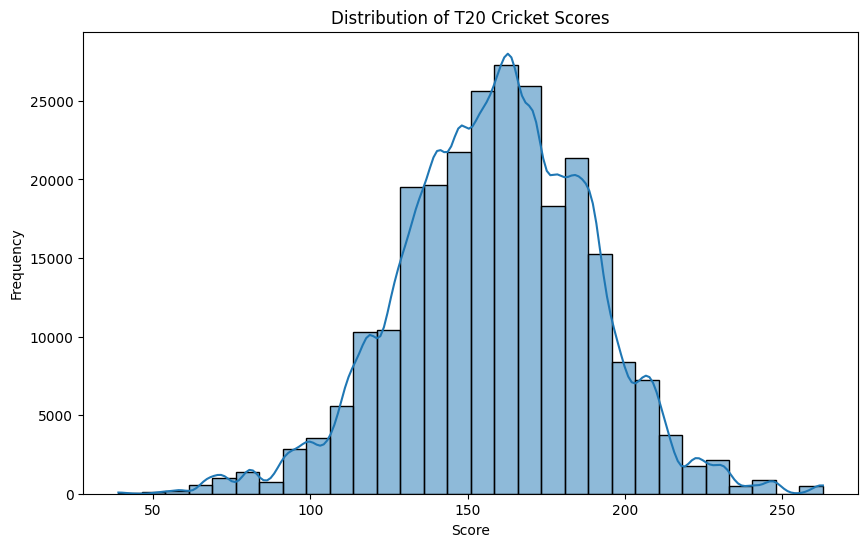

In [24]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(dataset.iloc[:, 14], bins=30, kde=True)
plt.title('Distribution of T20 Cricket Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

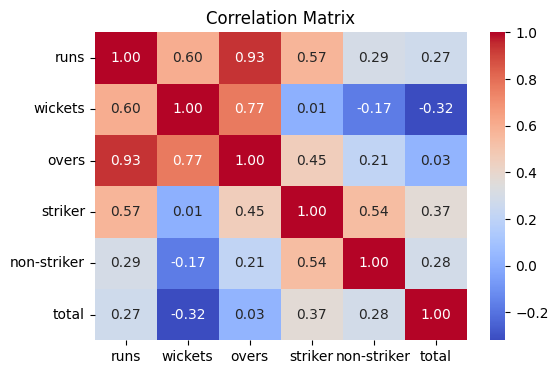

In [26]:

# Visualize the correlation matrix of features
correlation_matrix = dataset.iloc[:, [7, 8, 9, 12, 13, 14]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Data Preparation for training and testing

In [9]:
#Defining target function and input data for training

X = dataset.iloc[:,[7,8,9,12,13]].values
y = dataset.iloc[:, 14].values

In [10]:
# Splitting training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
#Normalising the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Custom Function for Accuracy

In [8]:
## Accuracy function

def custom_accuracy(y_test,y_pred,thresold):
    right = 0

    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

## Training the Linear Regression Model

In [12]:
# Linear Model on IPL data

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [14]:
# Evaluate Linear Regression Model
lin_score = lin_model.score(X_test, y_test)
lin_pred = lin_model.predict(X_test)

print("Linear Regression Model:")
print("R square value:", lin_score)
print("Mean Absolute Error:", mean_absolute_error(y_test, lin_pred))
print("Mean Squared Error:", mean_squared_error(y_test, lin_pred))
print("Custom Accuracy:", custom_accuracy(y_test, lin_pred, 20))

Linear Regression Model:
R square value: 0.5166139600148689
Mean Absolute Error: 15.477443015875169
Mean Squared Error: 441.08473388179084
Custom Accuracy: 72.81223714134397


In [35]:
# Example of interactive scatter plot with Plotly
import plotly.express as px

fig = px.scatter(x=y_test, y=lin_pred, labels={'x': 'Actual Scores', 'y': 'Predicted Scores'},
                 title='Linear Regression: Actual vs. Predicted Scores')
fig.show()


## Training the Random Forest Regression Model

In [15]:
## Random Forest Regression Model on IPL data

reg_model = RandomForestRegressor(n_estimators=100,max_features=None)
reg_model.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [17]:
reg_score = reg_model.score(X_test, y_test)
reg_pred = reg_model.predict(X_test)

print("\nRandom Forest Regression Model:")
print("R square value:", reg_score)
print("Mean Absolute Error:", mean_absolute_error(y_test, reg_pred))
print("Mean Squared Error:", mean_squared_error(y_test, reg_pred))
print("Custom Accuracy:", custom_accuracy(y_test, reg_pred, 20))


Random Forest Regression Model:
R square value: 0.7371275147806075
Mean Absolute Error: 9.122490075950754
Mean Squared Error: 239.8684086768566
Custom Accuracy: 86.57746347238232


In [36]:
# Example of interactive scatter plot with Plotly
import plotly.express as px

fig = px.scatter(x=y_test, y=reg_pred, labels={'x': 'Actual Scores', 'y': 'Predicted Scores'},
                 title='Linear Regression: Actual vs. Predicted Scores')
fig.show()

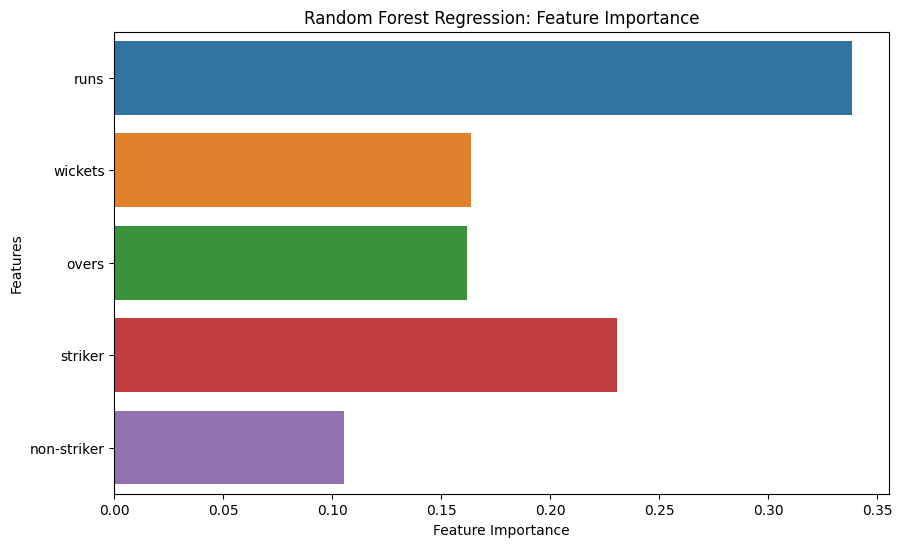

In [29]:
# Visualize feature importance for Random Forest Regression
feature_importance = reg_model.feature_importances_
feature_names = dataset.columns[[7, 8, 9, 12, 13]]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Random Forest Regression: Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

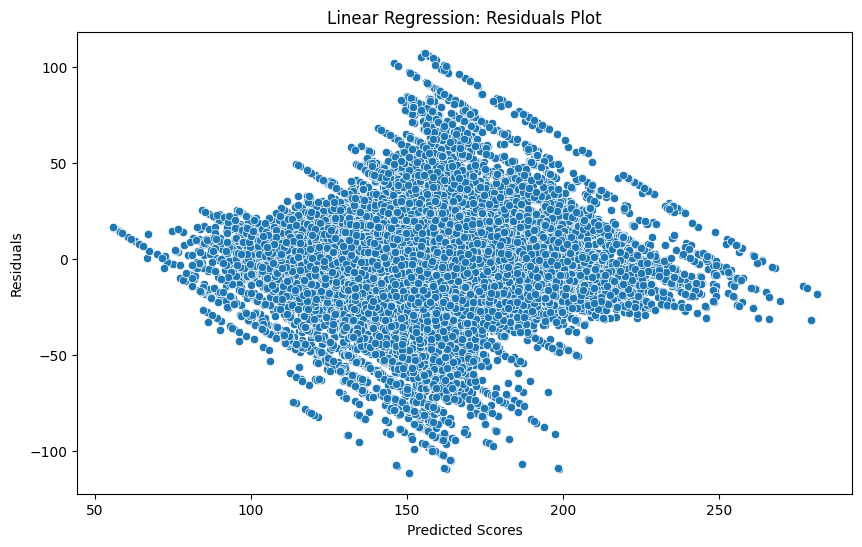

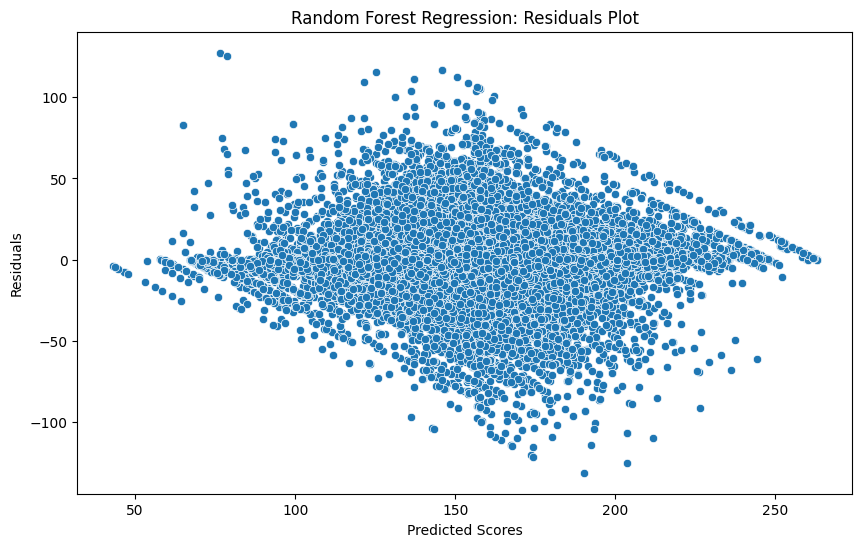

In [30]:
# Residual plots for Linear Regression
residuals_lin = y_test - lin_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(y=residuals_lin, x=lin_pred)
plt.title('Linear Regression: Residuals Plot')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.show()

# Residual plots for Random Forest Regression
residuals_reg = y_test - reg_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(y=residuals_reg, x=reg_pred)
plt.title('Random Forest Regression: Residuals Plot')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.show()

### Cross Validation Score and Comparison between models

In [31]:
# Cross-validation scores for Linear Regression
cv_scores_lin = cross_val_score(lin_model, X, y, cv=5)
print("Cross-Validation Scores (Linear Regression):", cv_scores_lin)

# Cross-validation scores for Random Forest Regression
cv_scores_reg = cross_val_score(reg_model, X, y, cv=5)
print("Cross-Validation Scores (Random Forest Regression):", cv_scores_reg)

Cross-Validation Scores (Linear Regression): [0.51417421 0.51017952 0.50721168 0.50929362 0.52623942]
Cross-Validation Scores (Random Forest Regression): [0.86810976 0.73889528 0.62354678 0.61647251 0.54080768]


## Results

In [18]:
def make_prediction(model, scaler, input_values):
    prediction = model.predict(scaler.transform(np.array([input_values])))
    return prediction[0]

Predicting score
1. At the end of 8 over
2. Runs at this stage is 80.
3. No of wickets down is 2.
4. Striker Score is 20.
5. Non Striker Score is 30.

In [21]:
# Example 1
input_values_1 = [80, 2, 8, 20, 30]
prediction_1_lin = make_prediction(lin_model, sc, input_values_1)
prediction_1_reg = make_prediction(reg_model, sc, input_values_1)

print("\nPrediction 1:")
print("Linear Regression Model Prediction:", prediction_1_lin)
print("Random Forest Regression Model Prediction:", prediction_1_reg)


Prediction 1:
Linear Regression Model Prediction: 178.03975692994675
Random Forest Regression Model Prediction: 168.4


Predicting score
1. At the end of 15 over
2. Runs at this stage is 140.
3. No of wickets down is 4.
4. Striker Score is 50.
5. Non Striker Score is 32.

In [22]:
# Example 2
input_values_2 = [140, 4, 15, 50, 32]
prediction_2_lin = make_prediction(lin_model, sc, input_values_2)
prediction_2_reg = make_prediction(reg_model, sc, input_values_2)

print("\nPrediction 2:")
print("Linear Regression Model Prediction:", prediction_2_lin)
print("Random Forest Regression Model Prediction:", prediction_2_reg)


Prediction 2:
Linear Regression Model Prediction: 183.5702168330207
Random Forest Regression Model Prediction: 181.62
